#Overview

This project focuses on building an intelligent crop recommendation system using machine learning models. It predicts the most suitable crop to cultivate based on three major climatic factors:


1.   Rainfall
2.   Temperature
3.   Humidity

By analyzing historical crop and climate data, this system aims to assist farmers, agronomists, and policymakers in making data-driven decisions to improve agricultural productivity.

##Objective

To compare multiple machine learning models and identify the most accurate one for crop recommendation based on climatic features.

##ML Models Used
1. Logistic Regression

2. Decision Tree Classifier

3. Random Forest Classifier

4. XGBoost Classifier

Each model is evaluated using:

Accuracy,
Precision,
Recall,
F1 Score

##Dataset

The dataset used is Crop_recommendation.csv, which contains the following columns:

1. Rainfall (mm)

2. Temperature (°C)

3. Humidity (%)

4. Crop (target variable)

Each row represents a scenario with climate readings and the corresponding best crop.

##Key Highlights

Data Preprocessing: Label encoding is used to convert crop names into numerical labels.

Training & Testing: 80-20 train-test split for fair evaluation.

Model Evaluation: Both tabular and visual comparisons using bar plots and line graphs.

Per-Crop Metrics: Precision, recall, and F1-score are visualized using heatmaps.

Model Comparison: A line graph shows how each model performs across all metrics.

Best Performing Model: The model with the highest average score is identified.

##Visualizations

 Line Graph: Comparison of accuracy, precision, recall, and F1 score across all models.

 Heatmap: Visualizes classification performance for each crop.

 Classification Report: Detailed metrics for individual crop predictions.

 Insights:

1. Random Forest and XGBoost consistently outperform simpler models like logistic regression.

2. Crops with distinct climatic needs (like apple and rice) are well-separated by the models.

3. The heatmap helps spot underperforming crops—those where the model often gets confused.

##Future Enhancements

1. Include soil pH, nitrogen, phosphorus, and potassium levels.

2. Incorporate weather forecasts to suggest crops dynamically.

3. Build a web/mobile app for real-time farmer interaction.

##Final Notes

This project proves that machine learning can effectively support sustainable agriculture. With further data inputs and tuning, this system can evolve into a reliable decision-support tool for crop plann

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [2]:
import pandas as pd
df = pd.read_csv('Crop_recommendation.csv')


Random forest model: with metrics like accuracy, recall, precision and fi score.
with detail classification report of different crop types.
Visualization: 1.Feature Importance
              2. correlation heatmap
              3. learning curve
              4. Accuracy vs Number of Trees
              5. 3d Scatter plot
Input crop to  show their specific favourable conditions with bar graph



Install/Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


##Load Dataset:
The Crop Recommendation Dataset contains information on various climatic and environmental conditions such as Rainfall (mm), Temperature (°C), and Humidity (%). Each data point is associated with a specific crop label, indicating which crop is most suitable for the given conditions. The dataset includes multiple crop types and serves as a valuable resource for developing predictive models in agriculture and smart farming. To be more specific as my project focus only on climatic conditions I have dropped the irrelevent attributes. Taken from kaggle https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [5]:
df = pd.read_csv('Crop_recommendation.csv')

##Label Encoding

 Label Encoding is the process of converting categorical labels (in this case, crop names like "rice", "apple", etc.) into numerical values so that machine learning algorithms can work with them effectively.

In [6]:
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])


##Feature Selection and Train-Test Split
In this project, we selected three key climatic features that play a crucial role in determining crop suitability:

Rainfall (in mm)

Temperature (in °C)

Humidity (in %)

These features were chosen from the dataset as they directly influence crop growth and yield.
To evaluate the model's performance, we divided the dataset into training and testing subsets using an 80-20 ratio.

80% of the data is used to train the model.

20% is used to test and validate how well the model performs on unseen data.

random_state=42 ensures reproducibility of results.

This ensures that the model generalizes well and isn't overfitting on the training data.


In [7]:
# 📊 Features & Target
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Train Random Forest
The Random Forest Classifier is an ensemble learning algorithm that builds multiple decision trees during training and merges their outputs to improve accuracy and control overfitting.

Why Random Forest?
It handles classification tasks efficiently.

It reduces overfitting by averaging multiple decision trees.

It performs well even with nonlinear relationships and missing data

In [8]:
# 🌲 Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##Prediction and Evaluation
Once the Random Forest Classifier is trained, it is used to make predictions on the test dataset. The predictions are then compared with the actual crop labels to evaluate the model's performance.

Evaluation Metrics:


We use the following metrics to assess the performance of the model:

Accuracy: Measures the overall correctness of the model.

Precision: Indicates how many of the predicted crops were actually correct.

Recall: Tells how well the model captures all the actual crops.

F1 Score: Harmonic mean of Precision and Recall, giving a balanced evaluation



In [10]:
# 🔮 Prediction & Evaluation
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n📊 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Detailed Report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



📊 Model Evaluation Metrics:
Accuracy  : 0.9068
Precision : 0.9121
Recall    : 0.9103
F1 Score  : 0.9075

📋 Detailed Classification Report:
              precision    recall  f1-score   support

       apple       0.91      0.87      0.89        23
      banana       0.95      0.90      0.93        21
   blackgram       0.74      0.85      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.81      0.96      0.88        27
      coffee       0.89      1.00      0.94        17
      cotton       0.84      0.94      0.89        17
      grapes       1.00      0.93      0.96        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       0.95      0.86      0.90        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       1.00      0.95      0.97      

##Feature Importance Plot
A Feature Importance Plot helps us understand how much each feature (Rainfall, Temperature, Humidity) contributes to the prediction made by the Random Forest model. This insight is useful to know which climatic factor plays the most important role in determining the suitable crop.

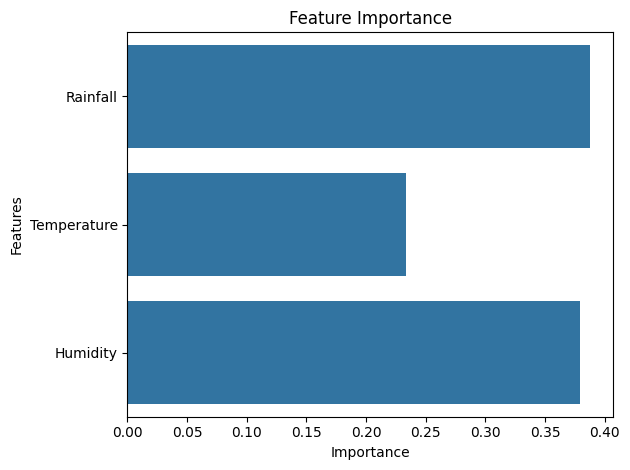

In [11]:
# 📉 Feature Importance
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


##Correlation Heatmap
A correlation heatmap helps visualize the strength and direction of relationships between numerical features in your dataset. In this crop recommendation project, we analyze how Rainfall, Temperature, and Humidity are related to each other.

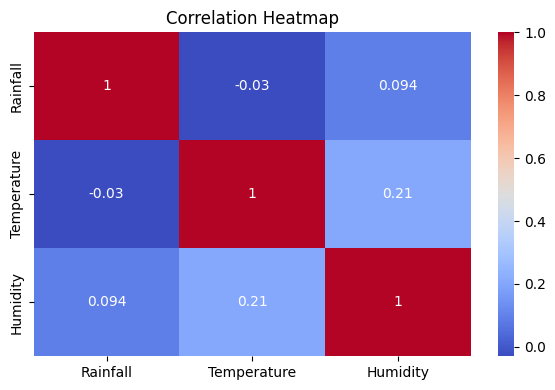

In [12]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rainfall', 'Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##Learning Curve
A learning curve shows how a model’s performance improves with increasing training data. It helps diagnose whether a model is underfitting, overfitting, or just right by comparing training and validation scores over time.

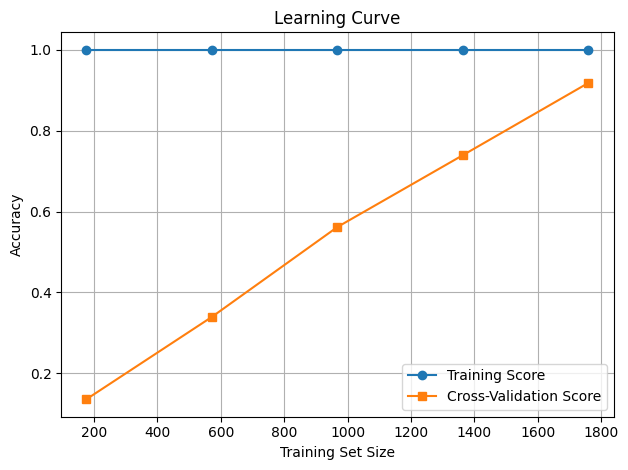

In [13]:
# 🚀 Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Accuracy vs Number of Trees
This analysis helps understand how the number of decision trees in a Random Forest affects the model’s accuracy. Generally, increasing the number of trees improves performance up to a certain point, beyond which the accuracy plateaus and training becomes computationally expensive.

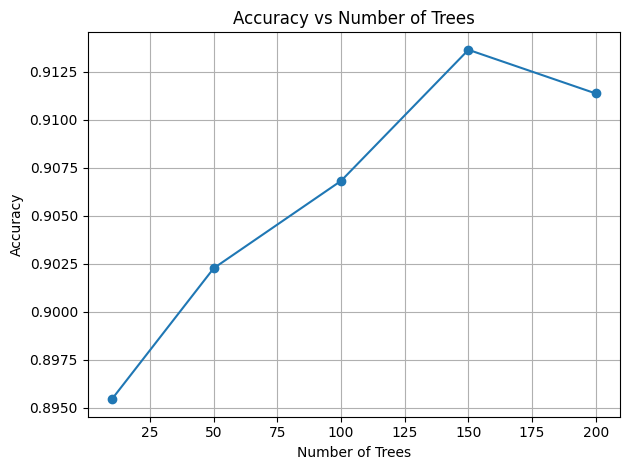

In [14]:
# 🌲 Accuracy vs Number of Trees
estimators = [10, 50, 100, 150, 200]
scores = []

for n in estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(estimators, scores, marker='o')
plt.title("Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


##3D Scatter Plot
The 3D Scatter Plot visually represents the relationship between Rainfall, Temperature, and Humidity for various crops. Each data point is color-coded according to the crop type, helping us understand how different crops cluster based on climatic conditions. This visualization is especially useful for identifying patterns or overlaps in environmental requirements among crops, and for observing which crops thrive under similar or distinct climate combinations.

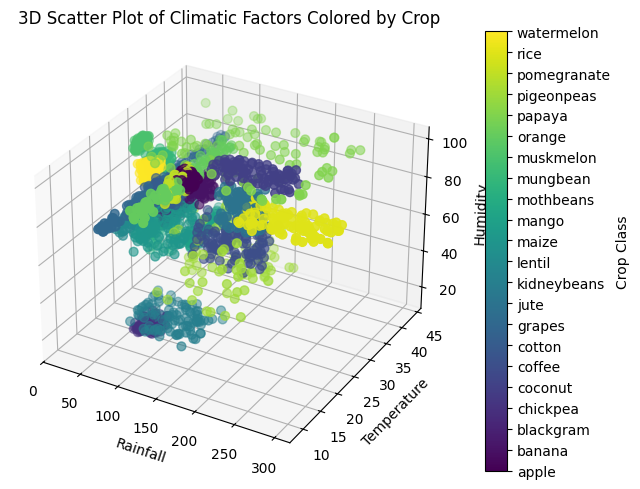

In [16]:
# 🌐 3D Scatter Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Rainfall'], df['Temperature'], df['Humidity'], c=df['Crop'], cmap='viridis', s=40)
ax.set_xlabel("Rainfall")
ax.set_ylabel("Temperature")
ax.set_zlabel("Humidity")
plt.title("3D Scatter Plot of Climatic Factors Colored by Crop")
cbar = plt.colorbar(sc, label='Crop Class')
tick_locs = np.arange(len(le.classes_))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(le.classes_)
plt.tight_layout()
plt.show()


##Crop-Specific Climate Condition Visualizer
The Crop-Specific Climate Condition Visualizer allows users to select a specific crop and view its optimal Rainfall, Temperature, and Humidity conditions using bar plots. By displaying the minimum, mean, and maximum values for each parameter, this tool provides insights into the climatic range in which a crop grows best. It's a valuable component for making informed crop recommendations based on local weather conditions or future climate scenarios.

Enter the name of the crop to see its favorable climate conditions: rice

🌦 Favorable Conditions for: rice
Average Rainfall   : 236.18 mm
Average Temperature: 23.69 °C
Average Humidity   : 82.27 %


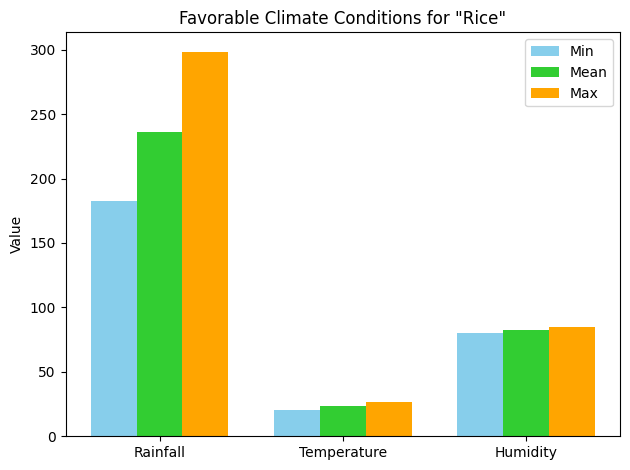

In [17]:
# 🌾 Input Crop to Show Favorable Conditions
user_crop = input("Enter the name of the crop to see its favorable climate conditions: ").strip().lower()

# Match label
matching_labels = [label for label in le.classes_ if label.lower() == user_crop]

if matching_labels:
    crop_label = matching_labels[0]
    encoded_label = le.transform([crop_label])[0]
    crop_data = df[df['Crop'] == encoded_label]

    print(f"\n🌦 Favorable Conditions for: {crop_label}")
    print(f"Average Rainfall   : {crop_data['Rainfall'].mean():.2f} mm")
    print(f"Average Temperature: {crop_data['Temperature'].mean():.2f} °C")
    print(f"Average Humidity   : {crop_data['Humidity'].mean():.2f} %")

    # Bar graph with min, mean, max
    means = [crop_data['Rainfall'].mean(), crop_data['Temperature'].mean(), crop_data['Humidity'].mean()]
    mins = [crop_data['Rainfall'].min(), crop_data['Temperature'].min(), crop_data['Humidity'].min()]
    maxs = [crop_data['Rainfall'].max(), crop_data['Temperature'].max(), crop_data['Humidity'].max()]

    labels = ['Rainfall', 'Temperature', 'Humidity']
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    ax.bar(x - width, mins, width, label='Min', color='skyblue')
    ax.bar(x, means, width, label='Mean', color='limegreen')
    ax.bar(x + width, maxs, width, label='Max', color='orange')

    ax.set_ylabel('Value')
    ax.set_title(f'Favorable Climate Conditions for "{user_crop.title()}"')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Crop not found. Please check the spelling or try another crop.")


Decision Tree model: with metrics like accuracy, recall, precision and fi score. with detail classification report of different crop types. Visualization: 1.Feature Importance 2. correlation heatmap 3. learning curve 4. Accuracy vs Number of Trees 5. 3d Scatter plot Input crop to show their specific favourable conditions with bar graph

Install/Import Libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


Load Dataset

In [19]:
# 📥 Load Dataset
df = pd.read_csv('Crop_recommendation.csv')

Label Encoding

In [20]:
# 🔠 Label Encoding
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])


Feature Selection and Train-Test Split

In [21]:
# 📊 Features & Target
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Train Decision Tree
The Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It works by splitting the data into branches based on feature values, making decisions at each node.



In [22]:
# 🌳 Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Prediction and Evaluation

In [23]:
# 🔮 Prediction & Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n📊 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



📊 Model Evaluation Metrics:
Accuracy  : 0.9023
Precision : 0.9062
Recall    : 0.9079
F1 Score  : 0.9025

📋 Detailed Classification Report:
              precision    recall  f1-score   support

       apple       0.90      0.83      0.86        23
      banana       0.87      0.95      0.91        21
   blackgram       0.74      0.85      0.79        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.93      0.93      0.93        27
      coffee       0.94      0.94      0.94        17
      cotton       0.84      0.94      0.89        17
      grapes       1.00      0.93      0.96        14
        jute       0.92      0.96      0.94        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       0.94      0.71      0.81        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       1.00      0.95      0.97      

Feature importance plot

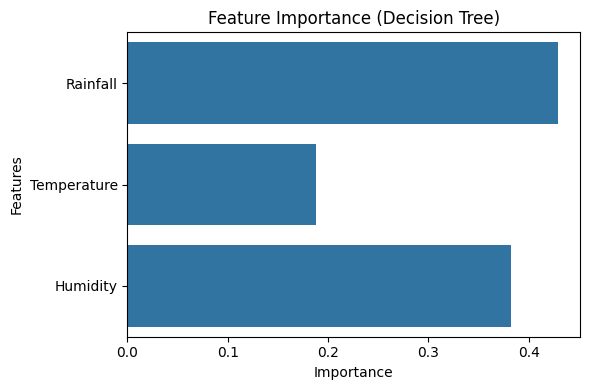

In [24]:
# ⭐ Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Correlation Heatmap

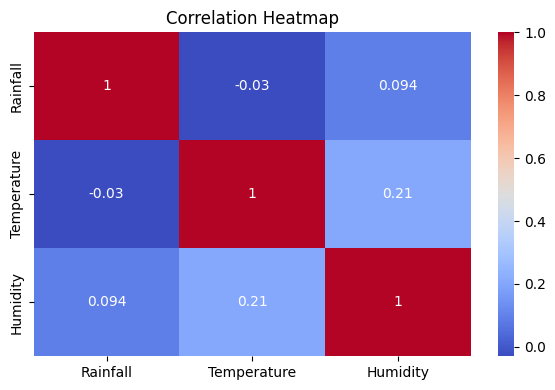

In [25]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rainfall', 'Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Learning Curve

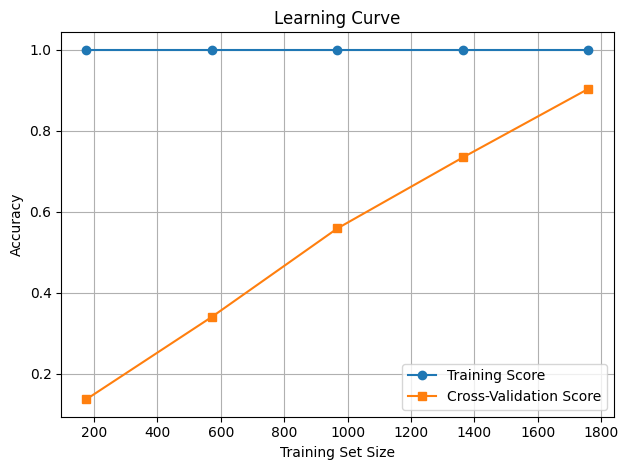

In [26]:
# 🚀 Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        scoring='accuracy')

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3d Scatter Plot

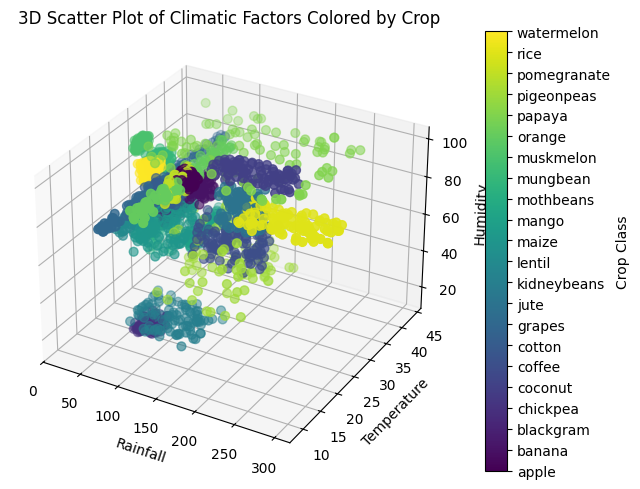

In [27]:
# 🌐 3D Scatter Plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Rainfall'], df['Temperature'], df['Humidity'], c=df['Crop'], cmap='viridis', s=40)
ax.set_xlabel("Rainfall")
ax.set_ylabel("Temperature")
ax.set_zlabel("Humidity")
plt.title("3D Scatter Plot of Climatic Factors Colored by Crop")
cbar = plt.colorbar(sc, label='Crop Class')
tick_locs = np.arange(len(le.classes_))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(le.classes_)
plt.tight_layout()
plt.show()


Crop-Specific Climate Condition Visualizer

Enter the name of the crop to see its favorable climate conditions: rice

🌦 Favorable Conditions for: rice
Average Rainfall   : 236.18 mm
Average Temperature: 23.69 °C
Average Humidity   : 82.27 %


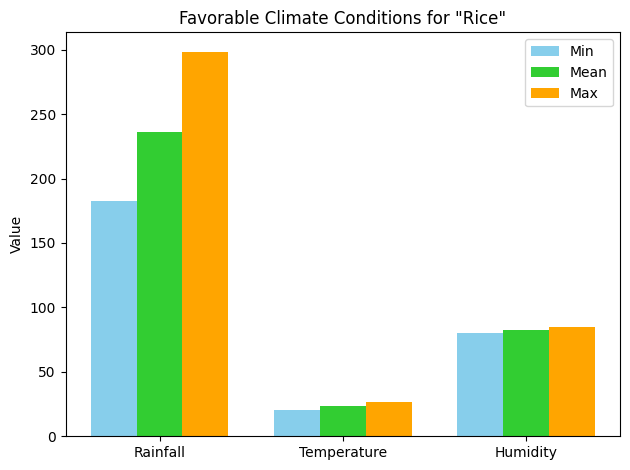

In [29]:
# 🌾 Input Crop to Show Favorable Conditions
user_crop = input("Enter the name of the crop to see its favorable climate conditions: ").strip().lower()

# Match label
matching_labels = [label for label in le.classes_ if label.lower() == user_crop]

if matching_labels:
    crop_label = matching_labels[0]
    encoded_label = le.transform([crop_label])[0]
    crop_data = df[df['Crop'] == encoded_label]

    print(f"\n🌦 Favorable Conditions for: {crop_label}")
    print(f"Average Rainfall   : {crop_data['Rainfall'].mean():.2f} mm")
    print(f"Average Temperature: {crop_data['Temperature'].mean():.2f} °C")
    print(f"Average Humidity   : {crop_data['Humidity'].mean():.2f} %")

    # 📊 Bar Graph (Min, Mean, Max)
    means = [crop_data['Rainfall'].mean(), crop_data['Temperature'].mean(), crop_data['Humidity'].mean()]
    mins = [crop_data['Rainfall'].min(), crop_data['Temperature'].min(), crop_data['Humidity'].min()]
    maxs = [crop_data['Rainfall'].max(), crop_data['Temperature'].max(), crop_data['Humidity'].max()]

    labels = ['Rainfall', 'Temperature', 'Humidity']
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    ax.bar(x - width, mins, width, label='Min', color='skyblue')
    ax.bar(x, means, width, label='Mean', color='limegreen')
    ax.bar(x + width, maxs, width, label='Max', color='orange')

    ax.set_ylabel('Value')
    ax.set_title(f'Favorable Climate Conditions for "{user_crop.title()}"')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Crop not found. Please check the spelling or try another crop.")


In [30]:
!pip install pandas scikit-learn matplotlib seaborn

Logistic Regression model: with metrics like accuracy, recall, precision and fi score. with detail classification report of different crop types. Visualization: 1.Feature Importance 2. correlation heatmap 3. learning curve 4. Accuracy vs Number of Trees 5. 3d Scatter plot Input crop to show their specific favourable conditions with bar graph

Import library

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


Load Dataset & Encode Target

In [32]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Encode crop labels
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])


Prepare Data & Train Model

In [33]:
# Features and target
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Evaluate Model

In [34]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Predictions and evaluation
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1 (macro averages account for multiple classes equally)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"📍 Precision (macro): {precision:.4f}")
print(f"📍 Recall (macro): {recall:.4f}")
print(f"📍 F1 Score (macro): {f1:.4f}")

# Full classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.6545454545454545
📍 Precision (macro): 0.6696
📍 Recall (macro): 0.6619
📍 F1 Score (macro): 0.6444

📋 Classification Report:

              precision    recall  f1-score   support

       apple       0.50      0.09      0.15        23
      banana       0.87      0.95      0.91        21
   blackgram       0.61      0.70      0.65        20
    chickpea       0.86      0.92      0.89        26
     coconut       0.79      0.85      0.82        27
      coffee       0.44      0.65      0.52        17
      cotton       0.61      0.65      0.63        17
      grapes       0.56      0.64      0.60        14
        jute       0.75      0.65      0.70        23
 kidneybeans       0.89      0.80      0.84        20
      lentil       0.64      0.82      0.72        11
       maize       0.70      0.67      0.68        21
       mango       0.73      1.00      0.84        19
   mothbeans       0.71      0.50      0.59        24
    mungbean       0.81      0.68      0.74        

Coefficient Importance Plot

<ipython-input-36-a71009590ad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='viridis')


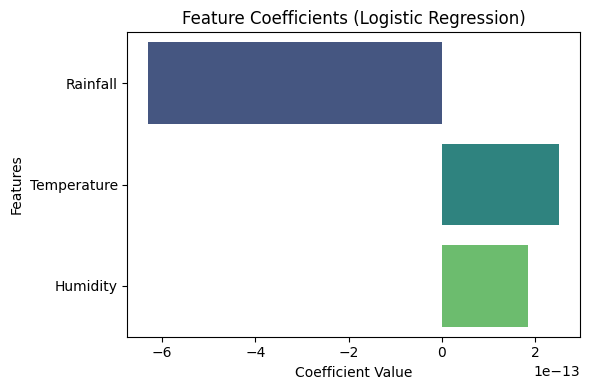

In [36]:
coefficients = model.coef_.mean(axis=0)
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Correlation Heatmap

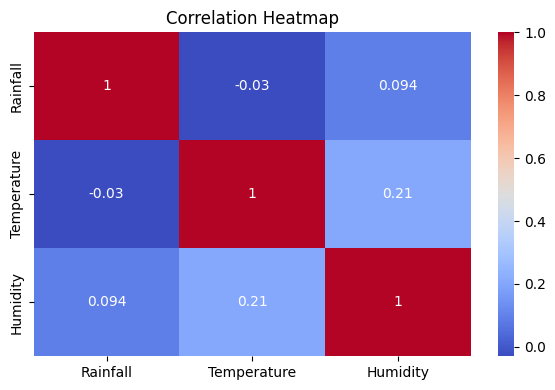

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rainfall', 'Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Learning Curve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

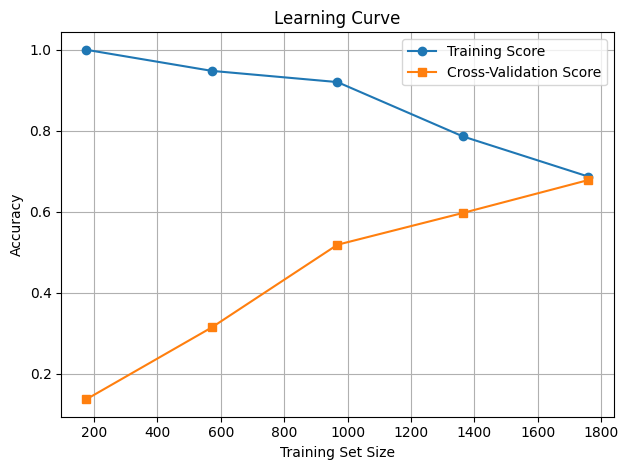

In [38]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        scoring='accuracy')

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3D Scatter Plot

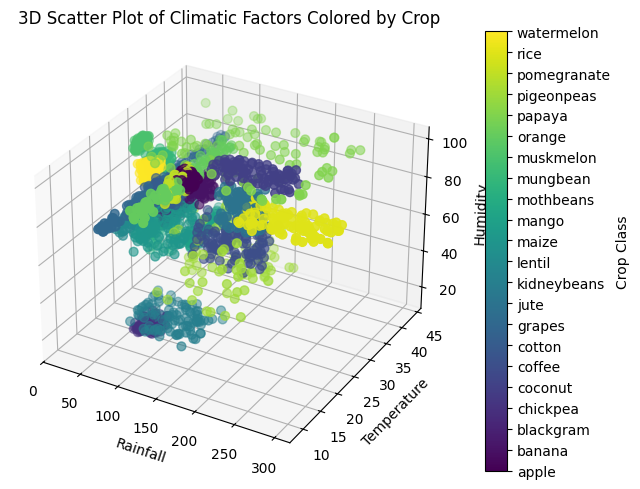

In [40]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Rainfall'], df['Temperature'], df['Humidity'], c=df['Crop'], cmap='viridis', s=40)
ax.set_xlabel("Rainfall")
ax.set_ylabel("Temperature")
ax.set_zlabel("Humidity")
plt.title("3D Scatter Plot of Climatic Factors Colored by Crop")

cbar = plt.colorbar(sc, label='Crop Class')
tick_locs = np.arange(len(le.classes_))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(le.classes_)
plt.tight_layout()
plt.show()


Input Crop → Show Favorable Conditions

Enter the name of the crop to see its favorable climate conditions: mungbean

Showing climate data for: mungbean
Average Rainfall: 48.40 mm
Average Temperature: 28.53 °C
Average Humidity: 85.50 %


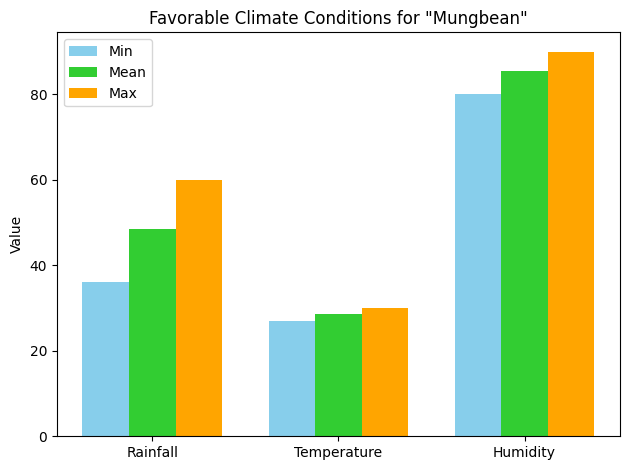

In [41]:
# 🌾 Input Crop to Show Favorable Conditions
user_crop = input("Enter the name of the crop to see its favorable climate conditions: ").strip().lower()

# Find matching rows
matching_labels = [label for label in le.classes_ if label.lower() == user_crop]

if matching_labels:
    crop_label = matching_labels[0]
    encoded_label = le.transform([crop_label])[0]
    crop_data = df[df['Crop'] == encoded_label]

    print(f"\nShowing climate data for: {crop_label}")
    print(f"Average Rainfall: {crop_data['Rainfall'].mean():.2f} mm")
    print(f"Average Temperature: {crop_data['Temperature'].mean():.2f} °C")
    print(f"Average Humidity: {crop_data['Humidity'].mean():.2f} %")

    means = [crop_data['Rainfall'].mean(), crop_data['Temperature'].mean(), crop_data['Humidity'].mean()]
    mins = [crop_data['Rainfall'].min(), crop_data['Temperature'].min(), crop_data['Humidity'].min()]
    maxs = [crop_data['Rainfall'].max(), crop_data['Temperature'].max(), crop_data['Humidity'].max()]

    labels = ['Rainfall', 'Temperature', 'Humidity']
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    ax.bar(x - width, mins, width, label='Min', color='skyblue')
    ax.bar(x, means, width, label='Mean', color='limegreen')
    ax.bar(x + width, maxs, width, label='Max', color='orange')

    ax.set_ylabel('Value')
    ax.set_title(f'Favorable Climate Conditions for \"{user_crop.title()}\"')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Crop not found. Please check the spelling or try another crop.")


In [42]:
!pip install xgboost seaborn matplotlib scikit-learn


XGBoost Classifier model: with metrics like accuracy, recall, precision and fi score. with detail classification report of different crop types. Visualization: 1.Feature Importance 2. correlation heatmap 3. learning curve 4. Accuracy vs Number of Trees 5. 3d Scatter plot Input crop to show their specific favourable conditions with bar graph

import libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier, plot_importance
from mpl_toolkits.mplot3d import Axes3D

 Load & Prepare the Dataset

In [45]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Encode crop labels
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

# Features and Target
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']


##Train XGBoost Model & Evaluate
XGBoost (Extreme Gradient Boosting) is an advanced and efficient implementation of the gradient boosting algorithm. It is known for its speed, performance, and ability to handle complex datasets with high accuracy.

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"🔍 Accuracy     : {accuracy:.4f}")
print(f"🎯 Precision    : {precision:.4f}")
print(f"📢 Recall       : {recall:.4f}")
print(f"🏅 F1 Score     : {f1:.4f}")
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:34:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Accuracy     : 0.9045
🎯 Precision    : 0.9082
📢 Recall       : 0.9045
🏅 F1 Score     : 0.9039

📋 Classification Report:

              precision    recall  f1-score   support

       apple       0.85      0.74      0.79        23
      banana       0.95      0.95      0.95        21
   blackgram       0.76      0.80      0.78        20
    chickpea       0.96      0.96      0.96        26
     coconut       0.81      0.93      0.86        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      0.94      0.91        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      1.00      1.00        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.92      1.00      0.96        11
       maize       0.90      0.86      0.88        21
       mango       0.90      1.00      0.95        19
   mothbeans       0.83      0.79      0.81        24
    mungbean       1.00      0.95      0.97        19
   muskmelon

Feature Importance

<Figure size 600x400 with 0 Axes>

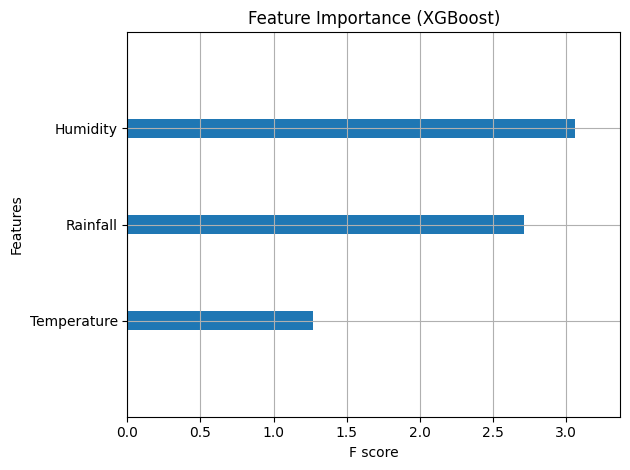

In [47]:
plt.figure(figsize=(6, 4))
plot_importance(model, importance_type='gain', show_values=False)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


Correlation Heatmap

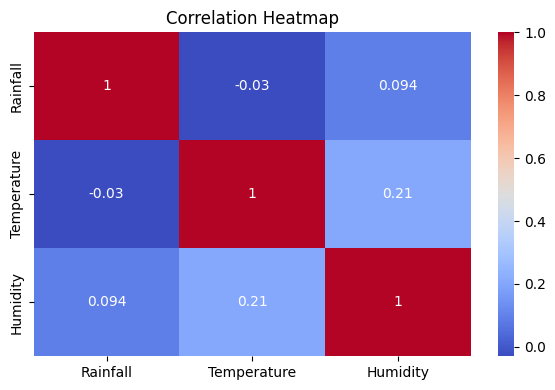

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rainfall', 'Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Learning Curve

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expe

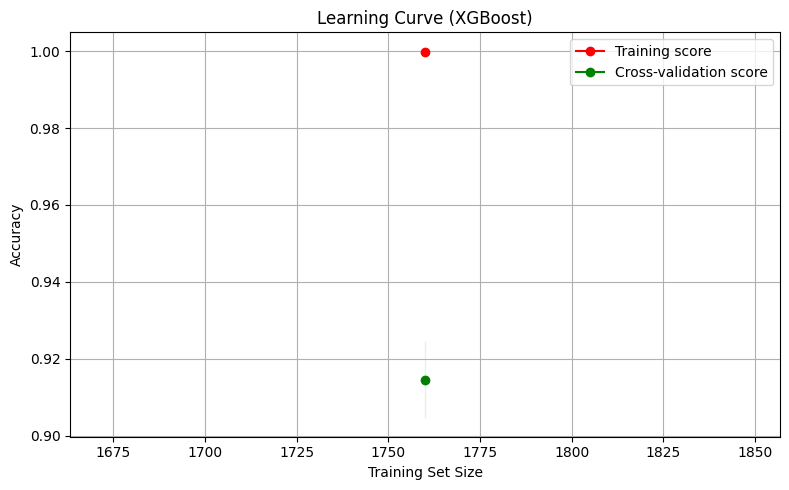

In [54]:
from sklearn.model_selection import learning_curve

# Generate robust train sizes (10 evenly spaced, unique integer sizes)
# Calculate n_max_training_samples
n_max_training_samples = len(X_train)  # Use the size of X_train, not X

# Generate train sizes within the valid range
train_sizes = np.linspace(0.2, 1.0, 10)
train_sizes = np.unique(train_sizes * n_max_training_samples // 1).astype(int)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve (XGBoost)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()



3D Scatter Plot

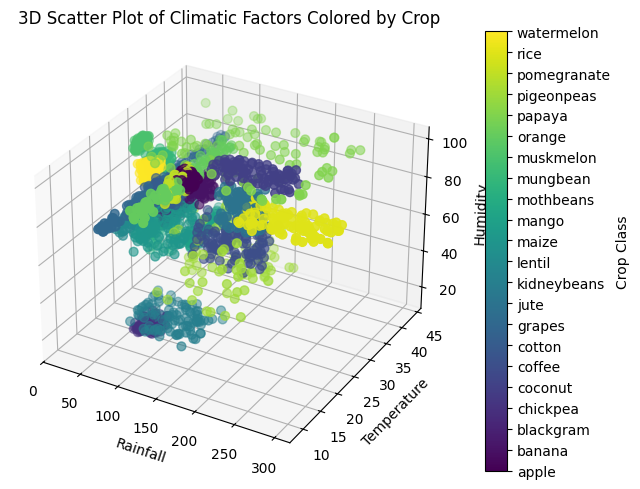

In [51]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Rainfall'], df['Temperature'], df['Humidity'], c=df['Crop'], cmap='viridis', s=40)
ax.set_xlabel("Rainfall")
ax.set_ylabel("Temperature")
ax.set_zlabel("Humidity")
plt.title("3D Scatter Plot of Climatic Factors Colored by Crop")
cbar = plt.colorbar(sc, label='Crop Class')
tick_locs = np.arange(len(le.classes_))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(le.classes_)
plt.tight_layout()
plt.show()

Crop-Specific Climate Insight

Enter the name of the crop to see its favorable climate conditions: lentil

Showing climate data for: lentil
Average Rainfall: 45.68 mm
Average Temperature: 24.51 °C
Average Humidity: 64.80 %


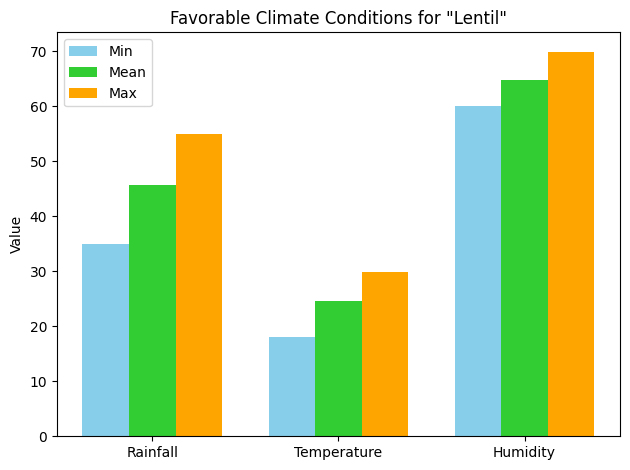

In [52]:
user_crop = input("Enter the name of the crop to see its favorable climate conditions: ").strip().lower()

matching_labels = [label for label in le.classes_ if label.lower() == user_crop]

if matching_labels:
    crop_label = matching_labels[0]
    encoded_label = le.transform([crop_label])[0]
    crop_data = df[df['Crop'] == encoded_label]

    print(f"\nShowing climate data for: {crop_label}")
    print(f"Average Rainfall: {crop_data['Rainfall'].mean():.2f} mm")
    print(f"Average Temperature: {crop_data['Temperature'].mean():.2f} °C")
    print(f"Average Humidity: {crop_data['Humidity'].mean():.2f} %")

    means = [crop_data['Rainfall'].mean(), crop_data['Temperature'].mean(), crop_data['Humidity'].mean()]
    mins = [crop_data['Rainfall'].min(), crop_data['Temperature'].min(), crop_data['Humidity'].min()]
    maxs = [crop_data['Rainfall'].max(), crop_data['Temperature'].max(), crop_data['Humidity'].max()]

    labels = ['Rainfall', 'Temperature', 'Humidity']
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    ax.bar(x - width, mins, width, label='Min', color='skyblue')
    ax.bar(x, means, width, label='Mean', color='limegreen')
    ax.bar(x + width, maxs, width, label='Max', color='orange')

    ax.set_ylabel('Value')
    ax.set_title(f'Favorable Climate Conditions for "{user_crop.title()}"')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Crop not found. Please check the spelling or try another crop.")


##Comparision of Accuracy, Precision, Recall and F1 Score of the 4 models above
To identify the best-performing algorithm for crop recommendation, we trained and evaluated four machine learning models:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

XGBoost Classifier

For each model, we calculated the following evaluation metrics:

Accuracy – Overall correctness of the model.

Precision – Correctness of positive predictions.

Recall – Ability to capture all relevant instances.

F1 Score – Balance between precision and recall.

These metrics were organized in a tabular format for easy comparison, and visualized using:

 Bar Graph to compare how each model performs across the four metrics.

 Line Plot to track metric values across models and identify trends.

 Random Forest emerged as the most effective model based on its highest average score across all metrics, making it the preferred choice for further crop-wise analysis.

This comparison helps ensure that the selected model isn't just accurate, but also balanced and consistent in performance across various evaluation dimensions.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score  Average
Random Forest          0.9068     0.9133  0.9068    0.9062   0.9083
XGBoost                0.9045     0.9082  0.9045    0.9039   0.9053
Decision Tree          0.9023     0.9120  0.9023    0.9030   0.9049
Logistic Regression    0.6545     0.6809  0.6545    0.6453   0.6588


<Figure size 1000x600 with 0 Axes>

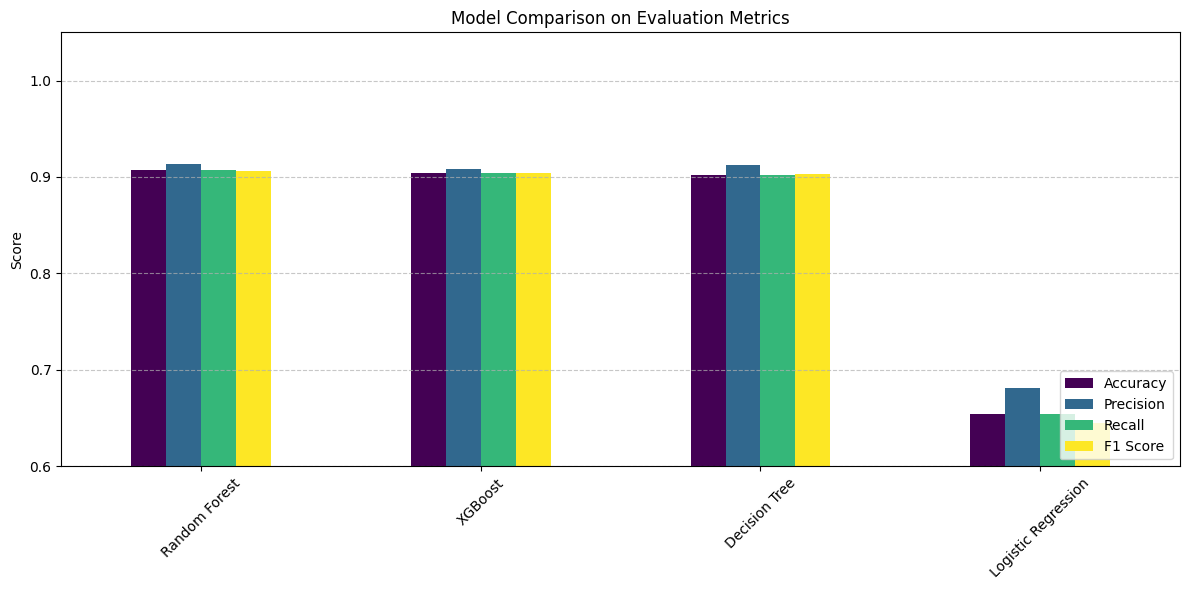


🏆 Best Model Based on Average Score: **Random Forest**


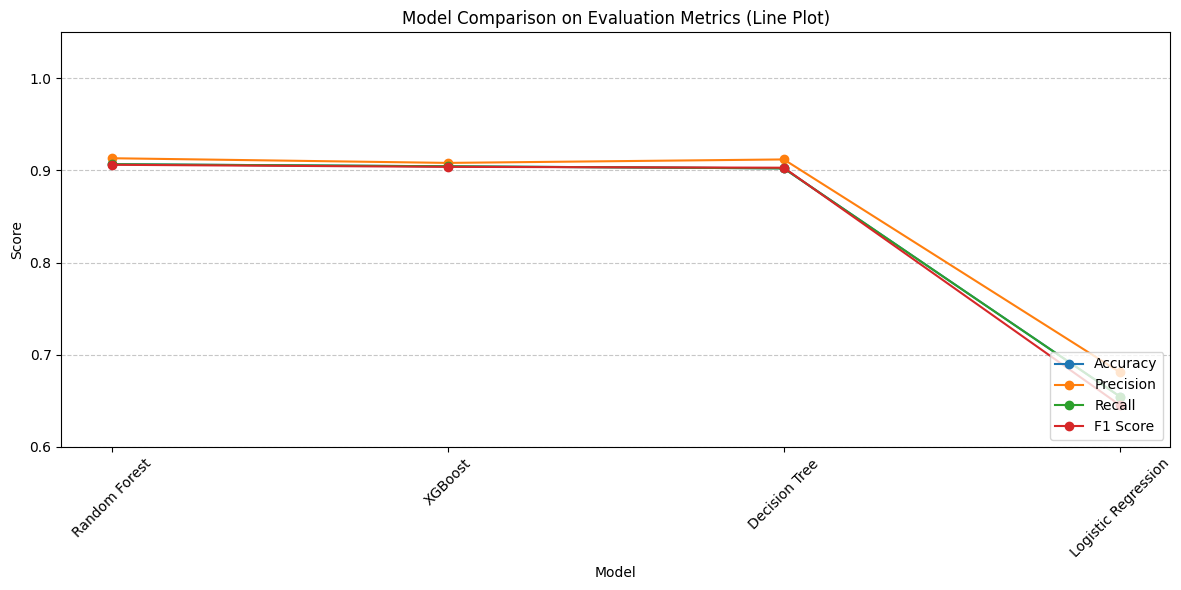

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Encode crop labels
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

# Features and target
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Average": np.mean([accuracy, precision, recall, f1])
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Average', ascending=False)

# Print comparison table
print("\n🔍 Model Performance Comparison:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average']].round(4))

# Barplot for visual comparison
plt.figure(figsize=(10, 6))
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Comparison on Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0.6, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Print best model
best_model = results_df.index[0]
print(f"\n🏆 Best Model Based on Average Score: **{best_model}**")

# Line plot for visual comparison
plt.figure(figsize=(12, 6))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title("Model Comparison on Evaluation Metrics (Line Plot)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.6, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


##Cropwise evaluated metrics
This is done using random forest model as it has the highest accuracy. After evaluating multiple models, Random Forest stood out as the top performer, achieving the highest accuracy. As a result, it was chosen for detailed analysis at the individual crop level.

We calculated key classification metrics — Precision, Recall, and F1-Score — for each crop using the Random Forest model. These metrics were then visualized using:

 A Heatmap: Highlights the performance of the model for each crop across the three evaluation metrics. It makes it easy to spot which crops are being predicted accurately and which may need further model tuning or more data.

 A Grouped Bar Chart: Provides a side-by-side comparison of Precision, Recall, and F1-Score for every crop, offering a clearer breakdown of the model's strengths and weaknesses.

 A Line Graph: Represents the trend of crop-wise performance scores, helping in identifying patterns or inconsistencies in the model’s prediction quality across different crops.

These visual tools collectively enhance interpretability and allow us to assess the Random Forest model's reliability for crop recommendation tasks in a more granular way.

🔍 Accuracy     : 0.9068
🎯 Precision    : 0.9133
📢 Recall       : 0.9068
🏅 F1 Score     : 0.9062

📋 Classification Report:

              precision    recall  f1-score   support

       apple       0.91      0.87      0.89        23
      banana       0.95      0.90      0.93        21
   blackgram       0.74      0.85      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.81      0.96      0.88        27
      coffee       0.89      1.00      0.94        17
      cotton       0.84      0.94      0.89        17
      grapes       1.00      0.93      0.96        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       0.95      0.86      0.90        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       1.00      0.95      0.97        19
   muskmelon

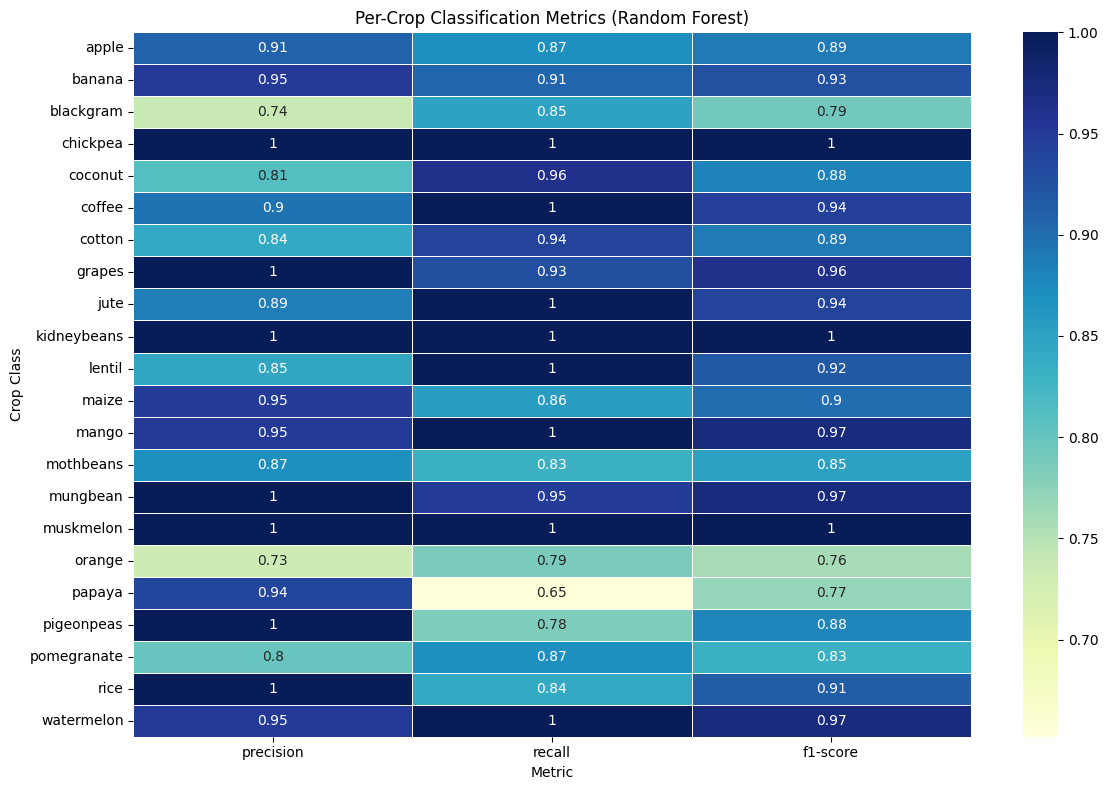

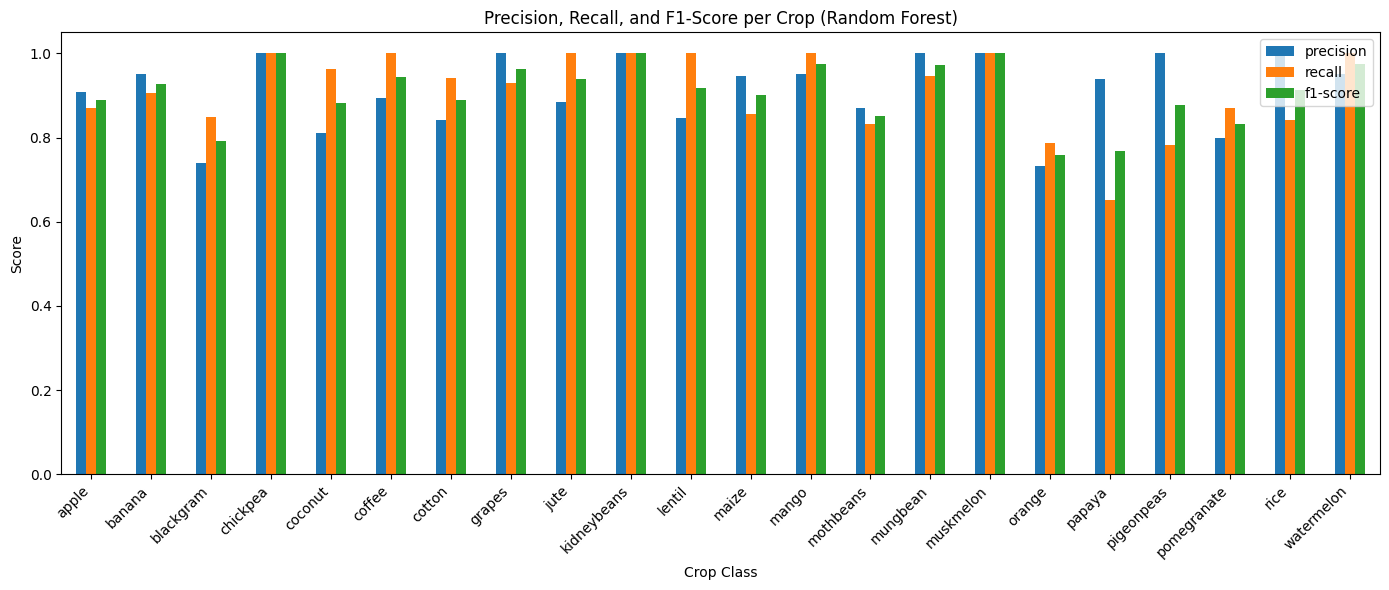

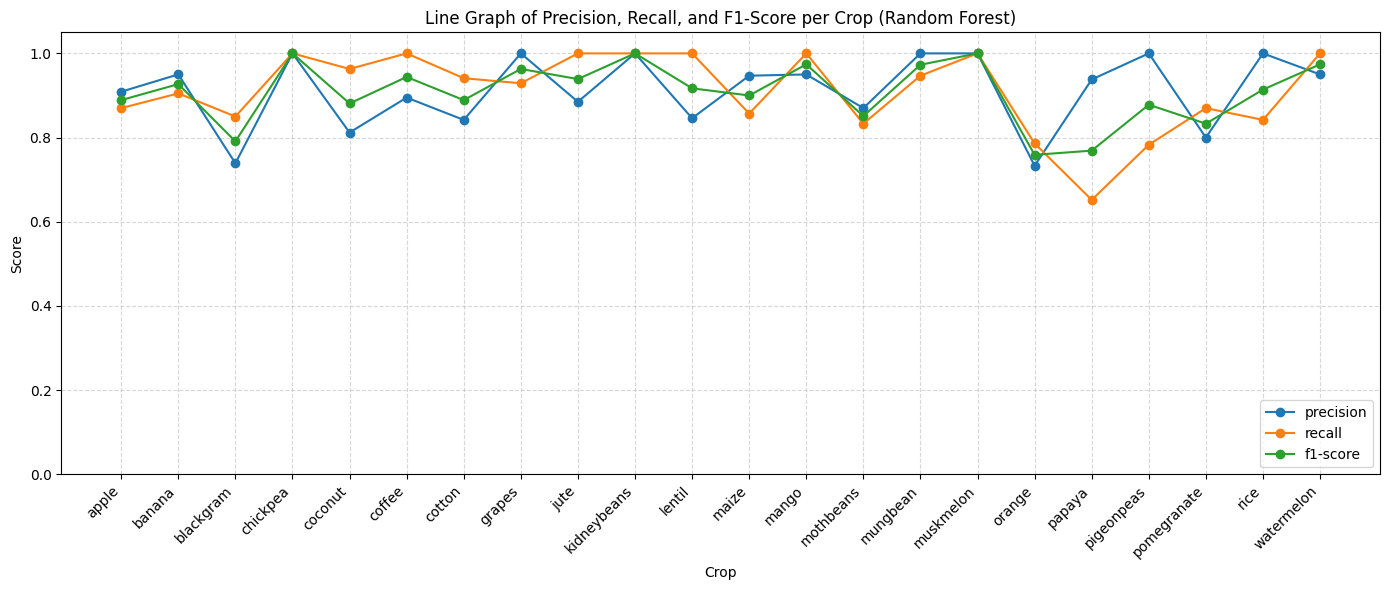

'\nfrom sklearn.metrics import confusion_matrix\n\n# Fit the best model again to ensure it\'s used for the confusion matrix\nfinal_model = models[best_model]\nfinal_model.fit(X_train, y_train)\ny_pred_final = final_model.predict(X_test)\n\n# Get confusion matrix\ncm = confusion_matrix(y_test, y_pred_final)\n\n# Get crop names sorted by encoded value\ncrop_names = le.inverse_transform(np.unique(y))  # y contains all encoded classes\n\n# Plot confusion matrix heatmap with annotations\nplt.figure(figsize=(14, 12))\nsns.heatmap(cm, annot=True, fmt=\'d\', cmap=\'YlGnBu\',\n            xticklabels=crop_names, yticklabels=crop_names)\nplt.title(f"🔁 Confusion Matrix Heatmap ({best_model}) - All Crops vs All Crops")\nplt.xlabel("Predicted Crop")\nplt.ylabel("Actual Crop")\nplt.xticks(rotation=90)\nplt.yticks(rotation=0)\nplt.tight_layout()\nplt.show()\n'

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# --------------------- 📥 Load Dataset ---------------------
df = pd.read_csv('Crop_recommendation.csv')

# --------------------- 🔤 Label Encode ---------------------
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

# --------------------- ✂️ Train-Test Split ---------------------
X = df[['Rainfall', 'Temperature', 'Humidity']]
y = df['Crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------- 🌳 Model Training ---------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --------------------- 📈 Predictions ---------------------
y_pred = model.predict(X_test)

# --------------------- 📊 Metrics ---------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"🔍 Accuracy     : {accuracy:.4f}")
print(f"🎯 Precision    : {precision:.4f}")
print(f"📢 Recall       : {recall:.4f}")
print(f"🏅 F1 Score     : {f1:.4f}")
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --------------------- 🌾 Per-Crop Classification Report ---------------------
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
crop_metrics_df = report_df.iloc[:-3]  # Remove 'accuracy', 'macro avg', 'weighted avg'
crop_metrics_df_rounded = crop_metrics_df[['precision', 'recall', 'f1-score']].round(3)

# 🔹 Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crop_metrics_df_rounded, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Per-Crop Classification Metrics (Random Forest)")
plt.ylabel("Crop Class")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 🔹 Grouped Bar Chart
crop_metrics_df_rounded.plot(kind='bar', figsize=(14, 6))
plt.title("Precision, Recall, and F1-Score per Crop (Random Forest)")
plt.xlabel("Crop Class")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# ➕ Line Graph for Random Forest Crop Metrics
# Train again to get detailed per-crop metrics
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_y_pred, target_names=le.classes_, output_dict=True)
rf_df = pd.DataFrame(rf_report).transpose()
rf_crop_metrics = rf_df.iloc[:-3][['precision', 'recall', 'f1-score']].round(3)

# 📈 Line Graph
plt.figure(figsize=(14, 6))
for metric in ['precision', 'recall', 'f1-score']:
    plt.plot(rf_crop_metrics.index, rf_crop_metrics[metric], marker='o', label=metric)

plt.title("Line Graph of Precision, Recall, and F1-Score per Crop (Random Forest)")
plt.xlabel("Crop")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


'''
from sklearn.metrics import confusion_matrix

# Fit the best model again to ensure it's used for the confusion matrix
final_model = models[best_model]
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Get crop names sorted by encoded value
crop_names = le.inverse_transform(np.unique(y))  # y contains all encoded classes

# Plot confusion matrix heatmap with annotations
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=crop_names, yticklabels=crop_names)
plt.title(f"🔁 Confusion Matrix Heatmap ({best_model}) - All Crops vs All Crops")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
'''